WeatherPy
----

# Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observations:

o	On a larger scale latitude and temperature exhibited a strong correlation.
    •	However, when the data is split between hemispheres, the northern hemisphere maintains the strong negative correlation the further from the equator it goes
    •	While the further south you go the warmer the temperature you collect for your data as evident with a positive correlation between the two.
    •	This may all affected by the time we are selecting to collect data as both hemispheres are constantly experiencing opposite seasons.

o	Humidity maintains a weak correlation to the latitude regardless of if the data is viewed as a whole or divided into hemispheres.

o	Cloudiness does not seem to be affected by the distance a city is from the equator.
    •	This is evident when comparing s.cloudiness.png and n.cloudiness.png against cloudiness.png. All the graphs show no correlation between cloudiness and latitude


In [1]:
%matplotlib inline

## Generate Cities List

In [2]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "imperial"
#query_url = f"{url}appid={api_key}"

#target_url = query_url + city.replace(" ", "+") + units
#response = requests.get(target_url)
#response_json = response.json()
#response_json

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key   

city_data = []

print("Beginning Data Retrieval    ")
print("----------------------------")

#counters
record_num =1
set_num = 1

for i, city in enumerate(cities):
   #create groups of 50
    if (i% 50 == 0 and i >= 50):
        set_num += 1
        record_num = 0
        
    #url for the loop to run through
    city_url = query_url + "&q=" + city.replace(" ", "+")
    #print(city_url)
    
    print("Processing Record {} of Set {} | {}".format(record_num, set_num, city))
    
    #update record_num within the loop
    record_num += 1
    
    #request info on each city
    try:
        city_response = requests.get(city_url).json()
        
        #within this response find the data necessary for DataFrame
        city_lat = city_response["coord"]["lat"]
        city_lon = city_response["coord"]["lon"]
        city_max_temp = city_response["main"]["temp_max"]
        city_humidity = city_response["main"]["humidity"]
        city_cloudiness = city_response["clouds"]["all"]
        city_windspeed = city_response["wind"]["speed"]
        city_country = city_response["sys"]["country"]
        city_date = city_response["dt"]
        
        #append the city info to empty list
        city_data.append({"City": city,
                         "Lat": city_lat, 
                         "Lng": city_lon,
                         "Max Temp": city_max_temp, 
                         "Humidity": city_humidity, 
                         "Cloudiness": city_cloudiness, 
                         "Wind Speed": city_windspeed,
                         "Country": city_country, 
                         "Date": city_date})
    #if no city info is found, skip
    except:
        print("City not found. Skipping ...")
        pass
    
print("---------------------")
print("Data Retrieval Complete")
print("---------------------")    




Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | grand forks
Processing Record 2 of Set 1 | chimore
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | barentsburg
City not found. Skipping ...
Processing Record 5 of Set 1 | boguchany
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | gat
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | airai
Processing Record 11 of Set 1 | umzimvubu
City not found. Skipping ...
Processing Record 12 of Set 1 | mabaruma
Processing Record 13 of Set 1 | lompoc
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | moscow
Processing Record 17 of Set 1 | makubetsu
Processing Record 18 of Set 1 | sayyan
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | mihijam
Processing Record 21 of Set 1 | yantal
Processing Record 22 of Set 1 | greyston

Processing Record 36 of Set 4 | saleaula
City not found. Skipping ...
Processing Record 37 of Set 4 | tuatapere
Processing Record 38 of Set 4 | cap malheureux
Processing Record 39 of Set 4 | padang
Processing Record 40 of Set 4 | anju
Processing Record 41 of Set 4 | upernavik
Processing Record 42 of Set 4 | aconibe
Processing Record 43 of Set 4 | krasnyy luch
Processing Record 44 of Set 4 | mabamba
Processing Record 45 of Set 4 | vaitupu
City not found. Skipping ...
Processing Record 46 of Set 4 | shenjiamen
Processing Record 47 of Set 4 | tabory
Processing Record 48 of Set 4 | port hardy
Processing Record 49 of Set 4 | chuy
Processing Record 0 of Set 5 | warqla
City not found. Skipping ...
Processing Record 1 of Set 5 | kabalo
Processing Record 2 of Set 5 | arosa
Processing Record 3 of Set 5 | bud
Processing Record 4 of Set 5 | jumla
Processing Record 5 of Set 5 | korcula
Processing Record 6 of Set 5 | tongliao
Processing Record 7 of Set 5 | kloulklubed
Processing Record 8 of Set 5 | 

Processing Record 24 of Set 8 | ahuimanu
Processing Record 25 of Set 8 | nanae
Processing Record 26 of Set 8 | mount gambier
Processing Record 27 of Set 8 | glenwood springs
Processing Record 28 of Set 8 | geraldton
Processing Record 29 of Set 8 | yuci
Processing Record 30 of Set 8 | erzin
Processing Record 31 of Set 8 | hay river
Processing Record 32 of Set 8 | areia branca
Processing Record 33 of Set 8 | vanimo
Processing Record 34 of Set 8 | leirvik
Processing Record 35 of Set 8 | sovetskiy
Processing Record 36 of Set 8 | aranos
Processing Record 37 of Set 8 | bandarbeyla
Processing Record 38 of Set 8 | flinders
Processing Record 39 of Set 8 | plaster rock
Processing Record 40 of Set 8 | porto santo
Processing Record 41 of Set 8 | las varas
Processing Record 42 of Set 8 | bluefields
Processing Record 43 of Set 8 | cabo rojo
Processing Record 44 of Set 8 | saravan
Processing Record 45 of Set 8 | healesville
Processing Record 46 of Set 8 | havre-saint-pierre
Processing Record 47 of Se

Processing Record 12 of Set 12 | ciudad bolivar
Processing Record 13 of Set 12 | yumen
Processing Record 14 of Set 12 | berlevag
Processing Record 15 of Set 12 | beyneu
Processing Record 16 of Set 12 | price
Processing Record 17 of Set 12 | sorland
Processing Record 18 of Set 12 | derzhavinsk
Processing Record 19 of Set 12 | lachi
Processing Record 20 of Set 12 | otofuke
Processing Record 21 of Set 12 | lazaro cardenas
Processing Record 22 of Set 12 | sinnamary
Processing Record 23 of Set 12 | ritchie
Processing Record 24 of Set 12 | ewo
Processing Record 25 of Set 12 | santa cecilia
Processing Record 26 of Set 12 | chontalpa
Processing Record 27 of Set 12 | quatre cocos
Processing Record 28 of Set 12 | loandjili
Processing Record 29 of Set 12 | bathsheba
Processing Record 30 of Set 12 | lasem
Processing Record 31 of Set 12 | liverpool
Processing Record 32 of Set 12 | tanabe
Processing Record 33 of Set 12 | saint-leu
Processing Record 34 of Set 12 | kamenskoye
City not found. Skipping 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#city_dict = {'City': city, 'Lat': [lat], 'Lng': lon, 'Max Temp': max_temp, 'Humidity': humidity, 'Cloudiness': cloudiness, 'Wind Speed': windspeed, 'Country': country, 'Date': date}
city_df = pd.DataFrame(city_data)
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grand forks,47.9417,-97.4337,15.80,92,1,5.75,US,1618915824
1,chimore,-16.9833,-65.1333,70.05,97,65,0.65,BO,1618915825
2,nikolskoye,59.7035,30.7861,53.60,20,0,15.66,RU,1618915508
3,boguchany,58.3814,97.4531,21.99,73,100,10.22,RU,1618915826
4,punta arenas,-53.1500,-70.9167,42.80,75,0,18.41,CL,1618915826
...,...,...,...,...,...,...,...,...,...
573,nome,64.5011,-165.4064,28.40,50,1,8.52,US,1618915595
574,camacha,33.0833,-16.3333,68.00,64,20,12.66,PT,1618915590
575,korla,41.7597,86.1469,73.99,20,45,13.76,CN,1618915671
576,alyangula,-13.8483,136.4192,80.60,94,69,8.88,AU,1618915472


In [7]:
city_df.to_csv("output.csv", index=False)

In [8]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02
mean,20.717345,21.191123,60.657474,65.790657,52.422145,8.383322,1.618916e+09
std,32.880773,91.181905,22.411111,24.825131,38.917257,5.594741,1.963633e+02
min,-54.800000,-175.200000,-3.440000,1.000000,0.000000,0.650000,1.618915e+09
25%,-6.798025,-63.411450,46.000000,50.000000,9.250000,4.055000,1.618916e+09
50%,27.500000,27.331250,65.075000,72.000000,63.000000,6.910000,1.618916e+09
75%,47.624975,104.021150,78.010000,86.000000,90.000000,11.500000,1.618916e+09
max,78.218600,178.416700,106.360000,100.000000,100.000000,28.680000,1.618916e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.

idx = city_df.index[city_df['Humidity']]
idx

Int64Index([92, 97, 20, 73, 75, 37, 94, 71, 89, 87,
            ...
            49, 94, 51, 94, 30, 50, 64, 20, 94, 79],
           dtype='int64', length=578)

In [10]:

new_city_df = city_df.drop(city_df.loc[city_df['Humidity'] > 100].index)
new_city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02
mean,20.717345,21.191123,60.657474,65.790657,52.422145,8.383322,1.618916e+09
std,32.880773,91.181905,22.411111,24.825131,38.917257,5.594741,1.963633e+02
min,-54.800000,-175.200000,-3.440000,1.000000,0.000000,0.650000,1.618915e+09
25%,-6.798025,-63.411450,46.000000,50.000000,9.250000,4.055000,1.618916e+09
50%,27.500000,27.331250,65.075000,72.000000,63.000000,6.910000,1.618916e+09
75%,47.624975,104.021150,78.010000,86.000000,90.000000,11.500000,1.618916e+09
max,78.218600,178.416700,106.360000,100.000000,100.000000,28.680000,1.618916e+09


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_df.drop(city_df.loc[city_df['Humidity'] > 100].index, inplace=False)
clean_city_data


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grand forks,47.9417,-97.4337,15.80,92,1,5.75,US,1618915824
1,chimore,-16.9833,-65.1333,70.05,97,65,0.65,BO,1618915825
2,nikolskoye,59.7035,30.7861,53.60,20,0,15.66,RU,1618915508
3,boguchany,58.3814,97.4531,21.99,73,100,10.22,RU,1618915826
4,punta arenas,-53.1500,-70.9167,42.80,75,0,18.41,CL,1618915826
...,...,...,...,...,...,...,...,...,...
573,nome,64.5011,-165.4064,28.40,50,1,8.52,US,1618915595
574,camacha,33.0833,-16.3333,68.00,64,20,12.66,PT,1618915590
575,korla,41.7597,86.1469,73.99,20,45,13.76,CN,1618915671
576,alyangula,-13.8483,136.4192,80.60,94,69,8.88,AU,1618915472


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

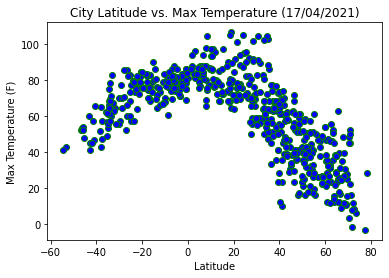

In [12]:
x_axis = clean_city_data['Lat']
temp = clean_city_data['Max Temp']
                           
plt.scatter(x_axis, temp, marker="o", color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs. Max Temperature (17/04/2021)")
plt.savefig("images/maxtemp.png")
plt.show()


## Latitude vs. Humidity Plot

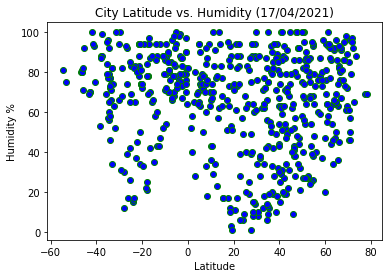

In [13]:
x_axis = clean_city_data['Lat']
y_axis = clean_city_data['Humidity']
plt.scatter(x_axis, y_axis, marker="o", color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title("City Latitude vs. Humidity (17/04/2021)")
plt.savefig("images/humidity.png")
plt.show()


## Latitude vs. Cloudiness Plot

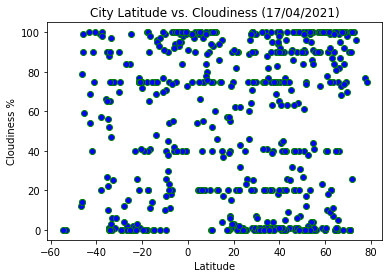

In [25]:
x_axis = clean_city_data['Lat']
clouds = clean_city_data['Cloudiness']
plt.scatter(x_axis, clouds, marker="o", color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title("City Latitude vs. Cloudiness (17/04/2021)")
plt.savefig("images/cloudiness.png")
plt.show()


## Latitude vs. Wind Speed Plot

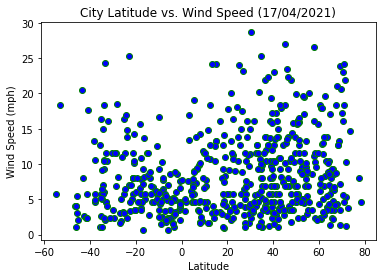

In [15]:
x_axis = clean_city_data['Lat']
speed = clean_city_data['Wind Speed']
plt.scatter(x_axis, speed, marker="o", color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed (17/04/2021)")
plt.savefig("images/windspeed.png")
plt.show()


# # Linear Regression

In [16]:
#determine the north and south hemisphere to pull data from
north_hemisphere = clean_city_data.loc[clean_city_data['Lat'] >= 0]
#north_hemisphere
south_hemisphere = clean_city_data.loc[clean_city_data['Lat'] < 0]
#south_hemisphere

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

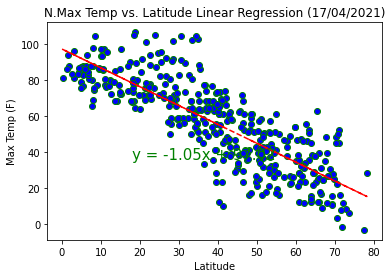

The r-squared value is 0.6819504776169756


In [17]:
x_axis = north_hemisphere['Lat']
y_axis = north_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("N.Max Temp vs. Latitude Linear Regression (17/04/2021)")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.savefig("images/n_maxtemp.png")
plt.show()
print(f"The r-squared value is {rvalue**2}")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

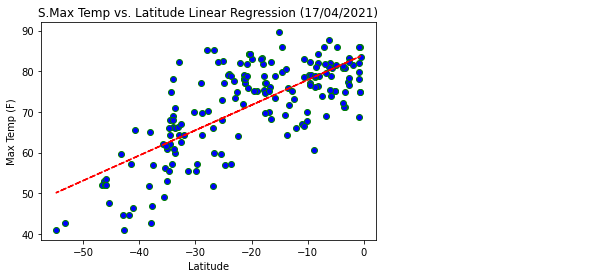

The r-squared value is 0.5379546983171599


In [18]:
x_axis = south_hemisphere['Lat']
y_axis = south_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("S.Max Temp vs. Latitude Linear Regression (17/04/2021)")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.savefig("images/s_maxtemp.png")
plt.show()
print(f"The r-squared value is {rvalue**2}")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

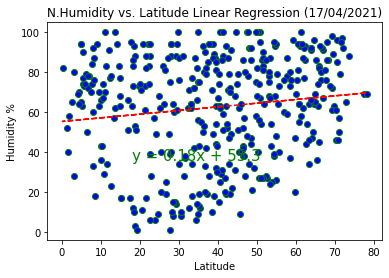

The r-squared value is 0.018496205252488667


In [19]:
x_axis = north_hemisphere['Lat']
y_axis = north_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title("N.Humidity vs. Latitude Linear Regression (17/04/2021)")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.savefig("images/n_humidity.png")
plt.show()
print(f"The r-squared value is {rvalue**2}")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

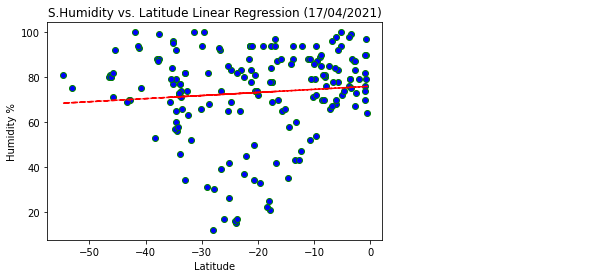

The r-squared value is 0.008290268179377712


In [20]:
x_axis = south_hemisphere['Lat']
y_axis = south_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title("S.Humidity vs. Latitude Linear Regression (17/04/2021)")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.savefig("images/s_humidity.png")
plt.show()
print(f"The r-squared value is {rvalue**2}")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

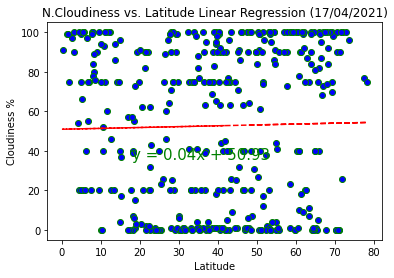

The r-squared value is 0.0004591664076131136


In [21]:
x_axis = north_hemisphere['Lat']
y_axis = north_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title("N.Cloudiness vs. Latitude Linear Regression (17/04/2021)")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.savefig("images/n_cloudines.png")
plt.show()
print(f"The r-squared value is {rvalue**2}")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

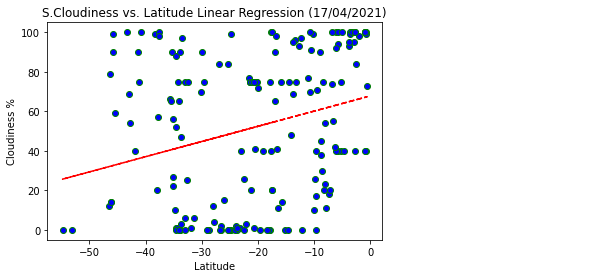

The r-squared value is 0.07314227014243033


In [22]:
x_axis = south_hemisphere['Lat']
y_axis = south_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title("S.Cloudiness vs. Latitude Linear Regression (17/04/2021)")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.savefig("images/s_cloudiness.png")
plt.show()
print(f"The r-squared value is {rvalue**2}")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

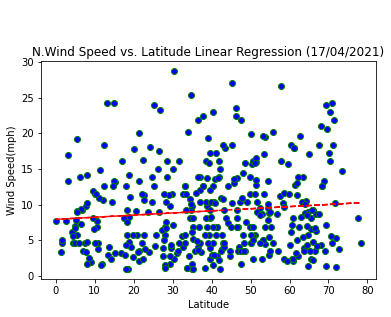

The r-squared value is 0.009691692235570364


In [23]:
x_axis = north_hemisphere['Lat']
y_axis = north_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title("N.Wind Speed vs. Latitude Linear Regression (17/04/2021)")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.savefig("images/n_windspeed.png")
plt.show()
print(f"The r-squared value is {rvalue**2}")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

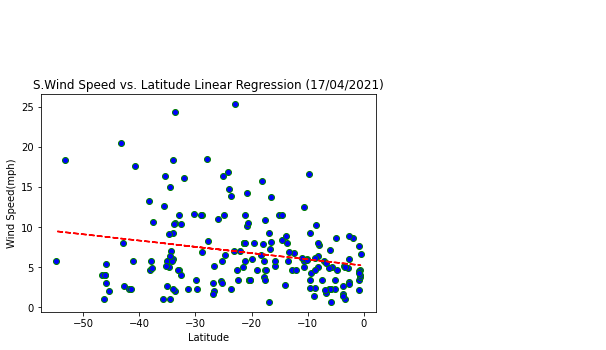

The r-squared value is 0.050495643028850005


In [24]:
x_axis = south_hemisphere['Lat']
y_axis = south_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title("S.Wind Speed vs. Latitude Linear Regression (17/04/2021)")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.savefig("images/s_windspeed.png")
plt.show()
print(f"The r-squared value is {rvalue**2}")
